# PROBLEM STATEMENT

- In this project, a regression model is developed to predict the probability of being accepted for Graduate school.
- Citation: Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019
- The dataset contains the following parameters: 
    -  Scores ( out of 340 ) 
    - TOEFL Scores ( out of 120 ) 
    - University Rating ( out of 5 ) 
    - Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
    - Undergraduate GPA ( out of 10 ) 
    - Research Experience ( either 0 or 1 ) 
    - Chance of Admit ( ranging from 0 to 1 )

# STEP1#: IMPORT USEFUL LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math


# STEP #2: IMPORT DATASET


In [2]:
adm_df=pd.read_csv(r'C:\Users\psc\Documents\Admission.csv')

In [3]:
adm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Admission Chance   400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
adm_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Admission Chance,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [5]:
adm_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
adm_df.drop(['Serial No.'],axis=1,inplace=True)
adm_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# STEP #3: VISUALIZE DATASET

<AxesSubplot: >

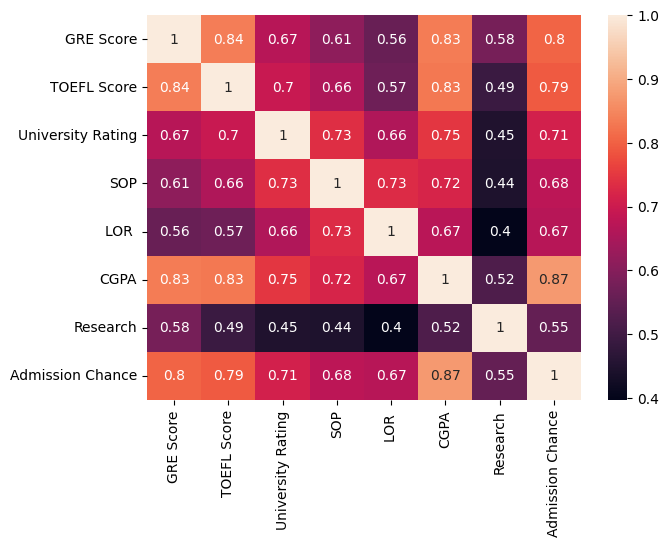

In [7]:
plt.figure(figsize=(7,5))
sns.heatmap(adm_df.corr(),annot=True)

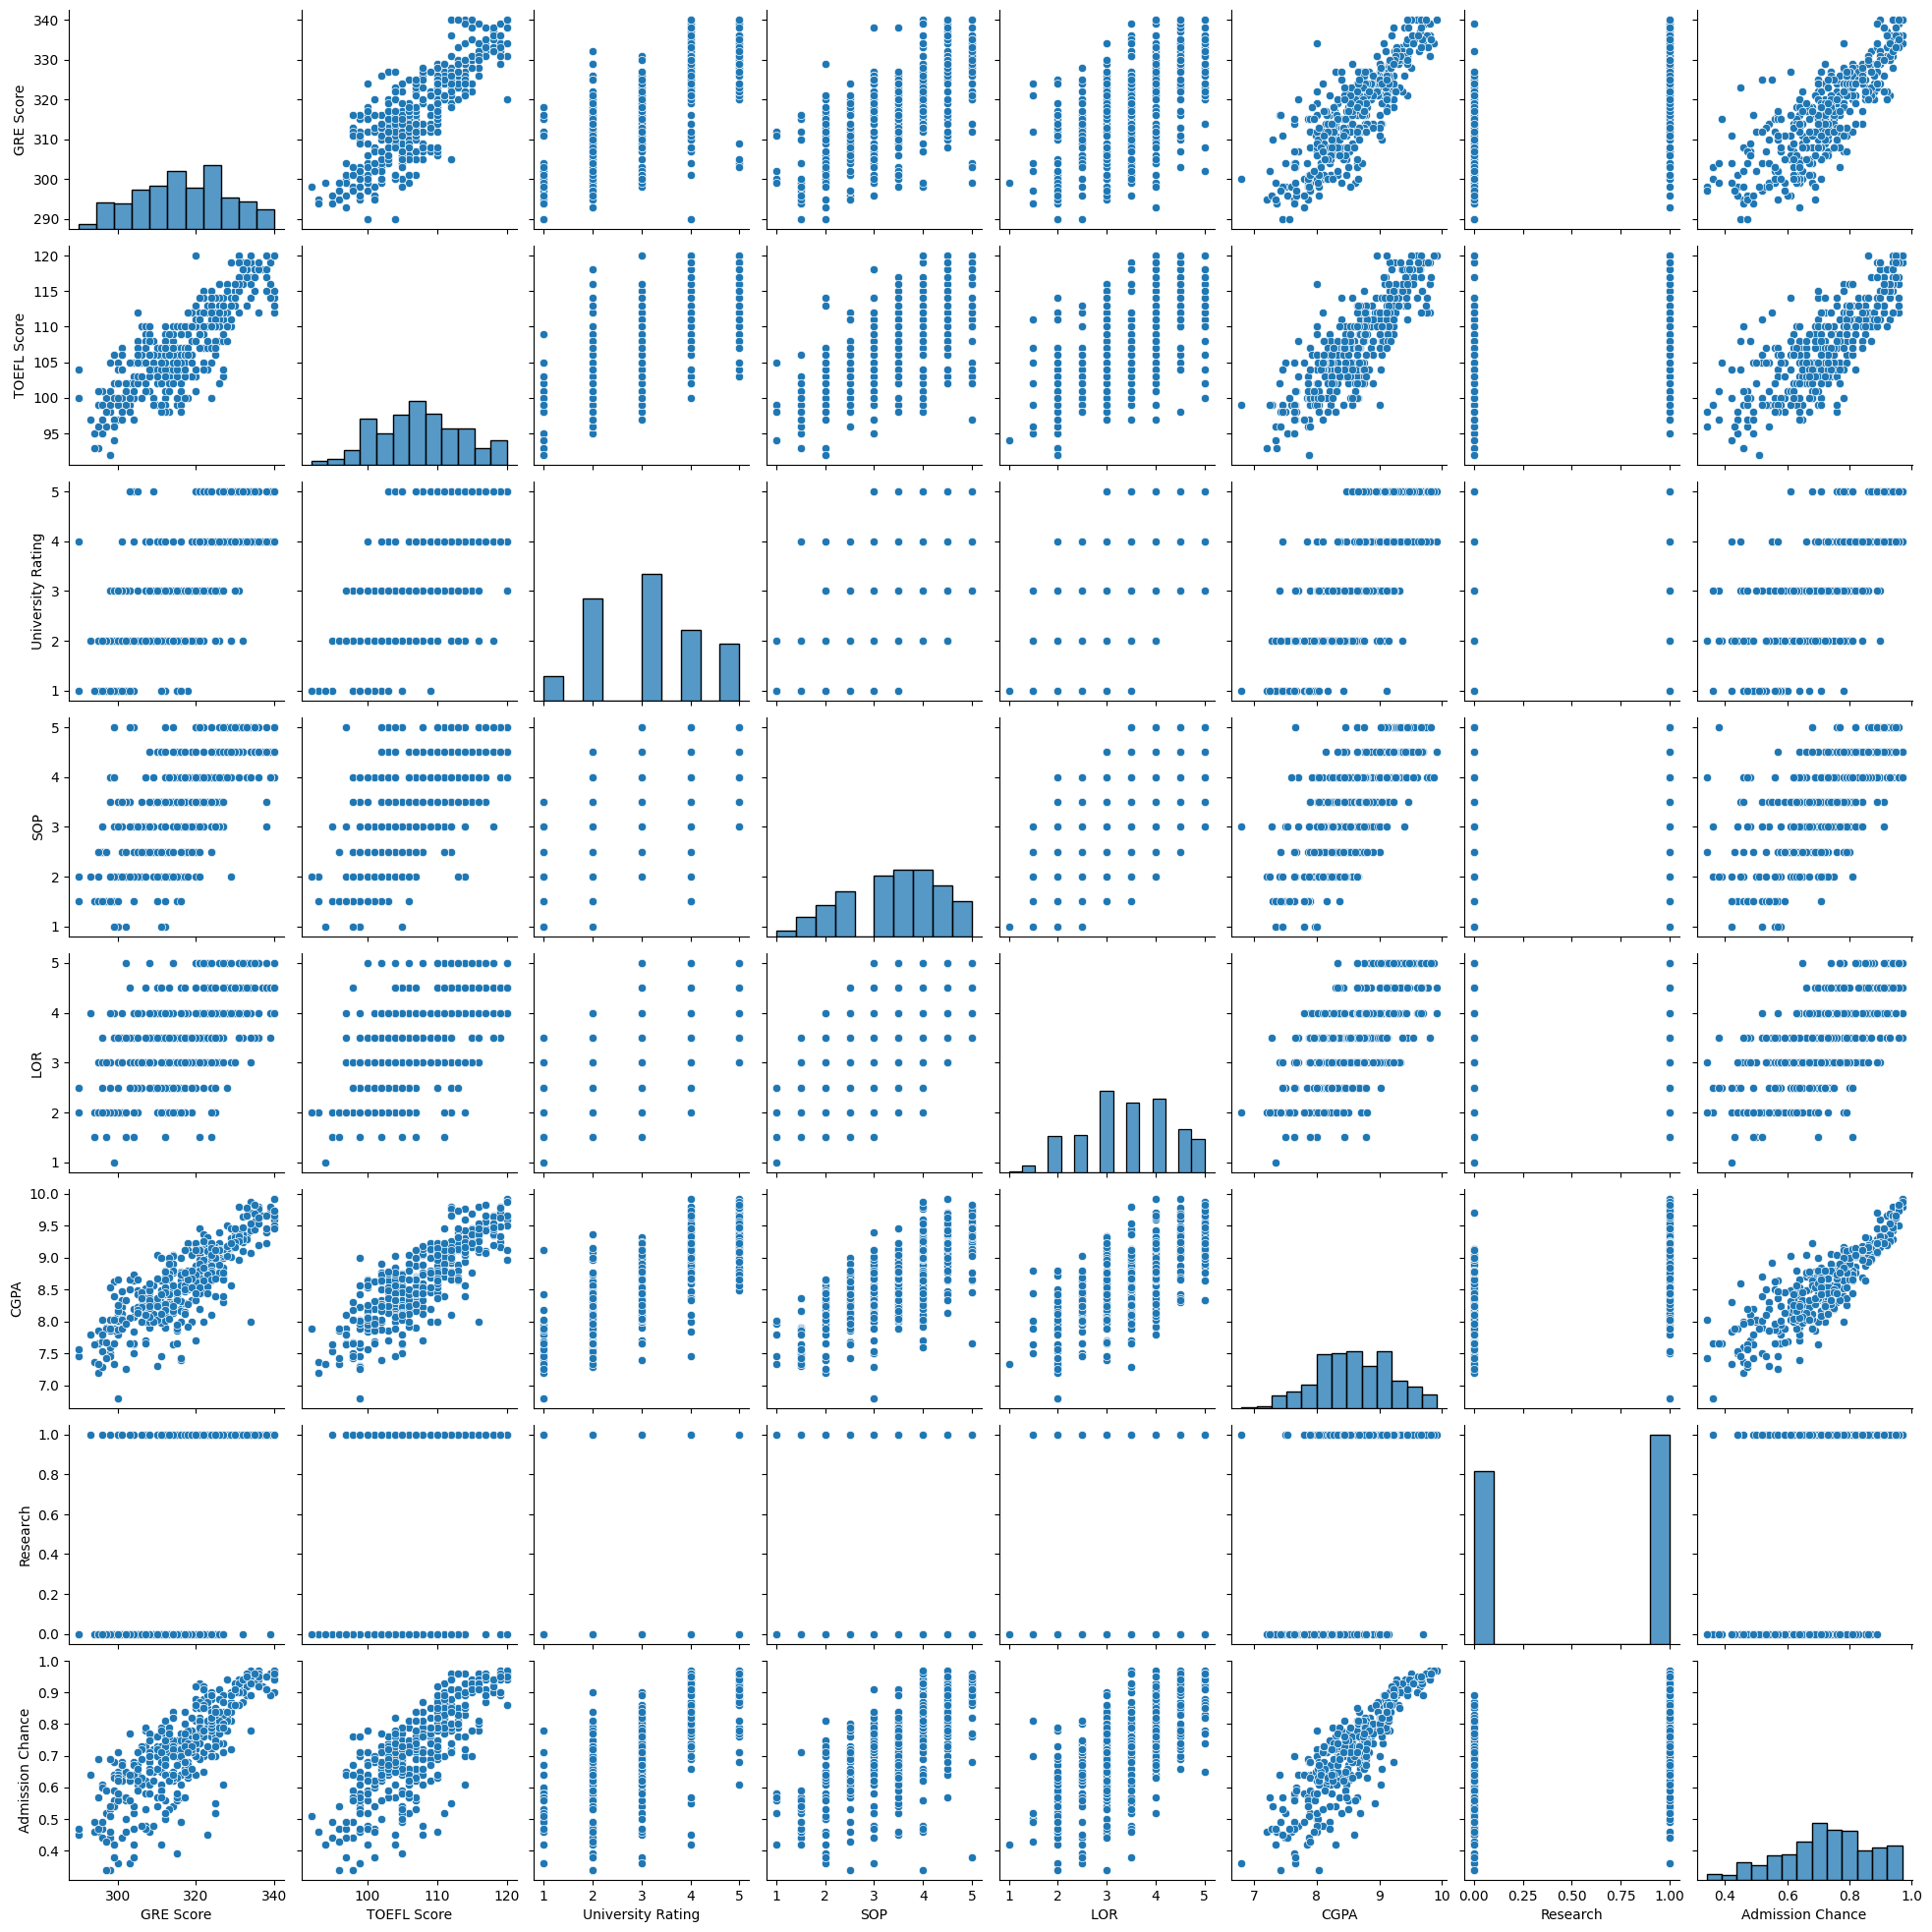

In [8]:
sns.pairplot(adm_df)

In [9]:
adm_df.isnull()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False


<AxesSubplot: >

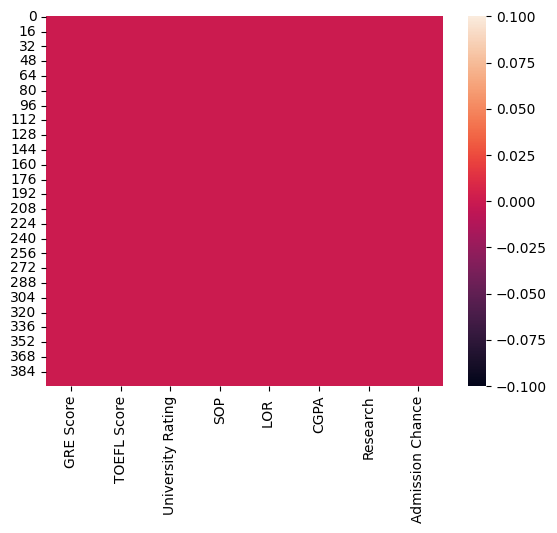

In [10]:
sns.heatmap(adm_df.isnull())

# STEP #4: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [11]:
x=adm_df.iloc[:,:-1]
y=adm_df.iloc[:,-1]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [13]:
x_train.shape

(320, 7)

In [14]:
x_test.shape

(80, 7)

# STEP #5: TRAINING THE MODEL

In [15]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred=regressor.predict(x_test)

# STEP #6: EVALUATING THE MODEL

Text(0.5, 0, 'Correct value')

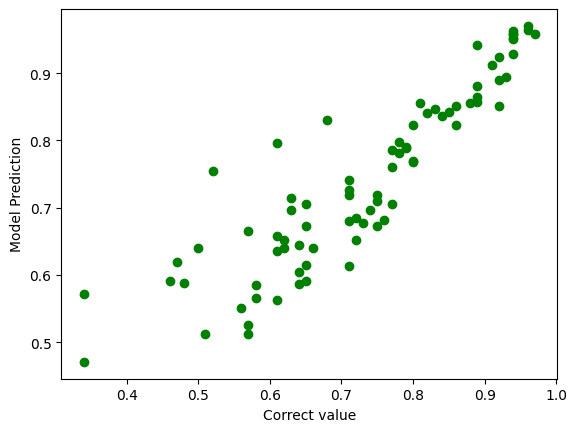

In [17]:
plt.scatter(y_test,y_pred,color='green')
plt.ylabel('Model Prediction')
plt.xlabel('Correct value')

# STEP #7: Eliminating Columns using Backward Elimination

In [18]:
x_train['const'] = 1

In [19]:
import statsmodels.api as smf  
# add a column of ones as integer data type 
#X_train = np.append(arr = np.ones((320,1)).astype(int), values=X_train, axis=1)

# choose a Significance level usually 0.05, if p>0.05 
#  for the highest values parameter, remove that value 

regressor_OLS=smf.OLS(endog = y_train, exog = x_train ).fit()  
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Admission Chance   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     181.7
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          4.74e-106
Time:                        14:20:24   Log-Likelihood:                 434.52
No. Observations:                 320   AIC:                            -853.0
Df Residuals:                     312   BIC:                            -822.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score             0.0016      0.001      2.391      0.017       0.000       0.003
TOEFL Score           0.0032      0.001      2.668      0.008       0.001       0.006
University Rating     0.0032      0.005      0.621      0.535      -0.007       0.013
SOP                  -0.0015      0.006     -0.246      0.806      -0.013       0.010
LOR                   0.0207      0.006      3.404      0.001       0.009       0.033
CGPA                  0.1235      0.013      9.309      0.000       0.097       0.150
Research              0.0193      0.009      2.206      0.028       0.002       0.036
const                -1.2811      0.139     -9.208      0.000      -1.555      -1.007
==============================================================================
Omnibus:                       68.511   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.375
Skew:                          -1.102   Prob(JB):                     3.30e-31
Kurtosis:                       5.382   Cond. No.                     1.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
err_val=math.sqrt(mean_squared_error(y_test,y_pred))
err_val

0.06724741348612182